In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt




In [4]:
plt.style.use('ggplot')
%matplotlib inline
# dirpath = 'content/sample_data/Total_Complaints_Received_2019-2021.xls'
df = pd.read_csv('/content/sample_data/Total_Complaints_Received_2019-2021.xls')
df.head()

,TypeofComplaints,#ofComplaints,#ofFIRs,#ofOnlineFIRS
0,Oral Complaints,8585351,690094,0
1,Narrated to O/C / SHO,930369,621456,0
2,Distress call over phone/Dial 100 etc,7654982,68638,0
3,Written Complaints,8894954,5220773,185443
4,To O/C / SHO,4709804,3496161,0


In [5]:
# Sort the DataFrame by the number of complaints in descending order and get the top 10
data = df.sort_values('#ofComplaints', ascending=False).head(10)


In [6]:
df.head(10)

,TypeofComplaints,#ofComplaints,#ofFIRs,#ofOnlineFIRS
0,Oral Complaints,8585351,690094,0
1,Narrated to O/C / SHO,930369,621456,0
2,Distress call over phone/Dial 100 etc,7654982,68638,0
3,Written Complaints,8894954,5220773,185443
4,To O/C / SHO,4709804,3496161,0
5,To SP/Senior Officers,1275123,127955,0
6,Electronic Form,681373,15510,185443
7,Court Complaints,111812,105939,0
8,NHRC & SHRC,22855,885,0
9,Commissions for SCs,7348,208,0


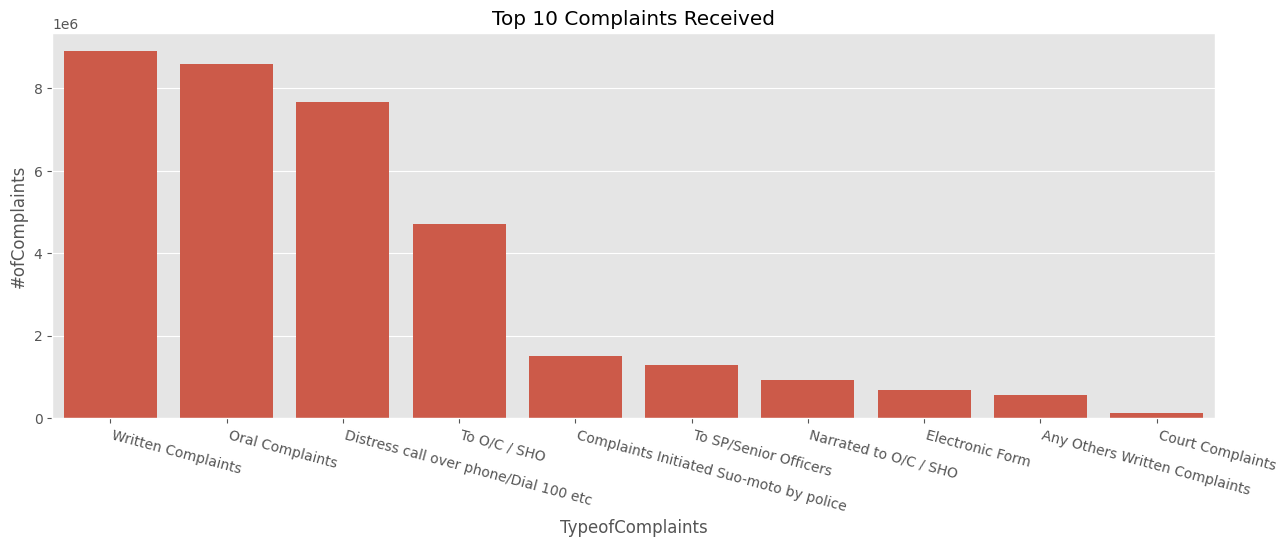

In [8]:
# Plotting the bar plot
plt.figure(figsize=(15,5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 Complaints Received')
barplot = sns.barplot(data=data, x='TypeofComplaints', y='#ofComplaints')

In [9]:
# Adding numeric values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

In [10]:
plt.show()
# Sort the DataFrame by the number of FIRs in descending order and get the top 6
data = df.sort_values('#ofFIRs', ascending=False).head(10)

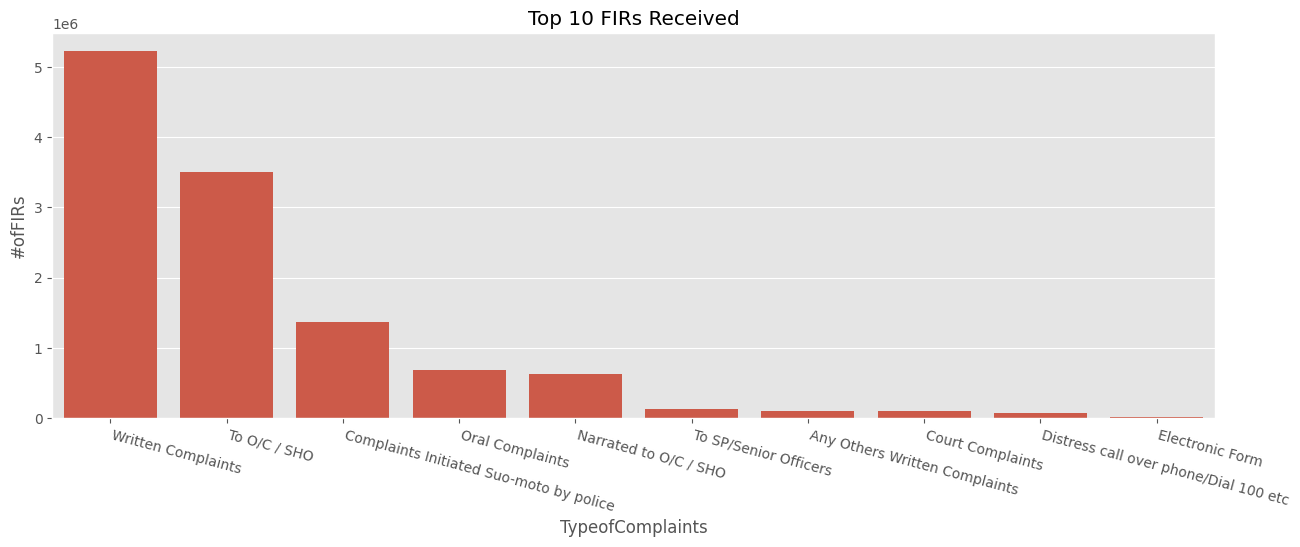

In [11]:
# Plotting the bar plot
plt.figure(figsize=(15,5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 FIRs Received')
barplot = sns.barplot(data=data, x='TypeofComplaints', y='#ofFIRs')

In [12]:
# Adding numeric values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

In [13]:
plt.show()

In [15]:
df = pd.read_csv('/content/sample_data/IPC_crimes_(City-wise)_2019-2021.xls',index_col=[0])
df.head()

,City,2019,2020,2021,Population,RateofCognizableCrimes,ChargesSheetingRate
S.No,,,,,,,
1,Agra,6510,6285,5665,17.5,324.5,58.0
2,Allahabad,5621,5455,4130,12.2,339.4,68.2
3,Amritsar,2589,3178,3349,11.8,282.9,54.8
4,Asansol,4244,4335,4864,12.4,391.3,95.8
5,Aurangabad,5636,6248,7366,11.9,619.5,82.6


In [20]:
# Calculate total crimes for each state/UT
total_crimes = df.groupby('City')['RateofCognizableCrimes'].sum().sort_values(ascending=False)

In [19]:
print(df.columns)


Index(['City', '2019', '2020', '2021', 'Population', 'RateofCognizableCrimes',
       'ChargesSheetingRate'],
      dtype='object')


In [21]:
# Get the top 5 states/UTs
top_5 = total_crimes.head(5)

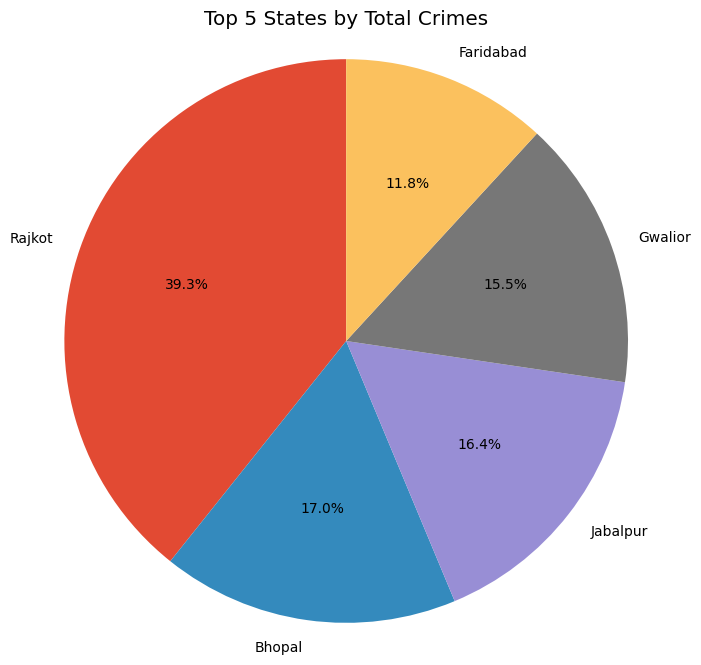

In [24]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 States by Total Crimes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [25]:
# Sort the DataFrame by the rate of cognizable crimes in descending order and get the top 10
top_10 = df.sort_values('RateofCognizableCrimes', ascending=False).head(10)

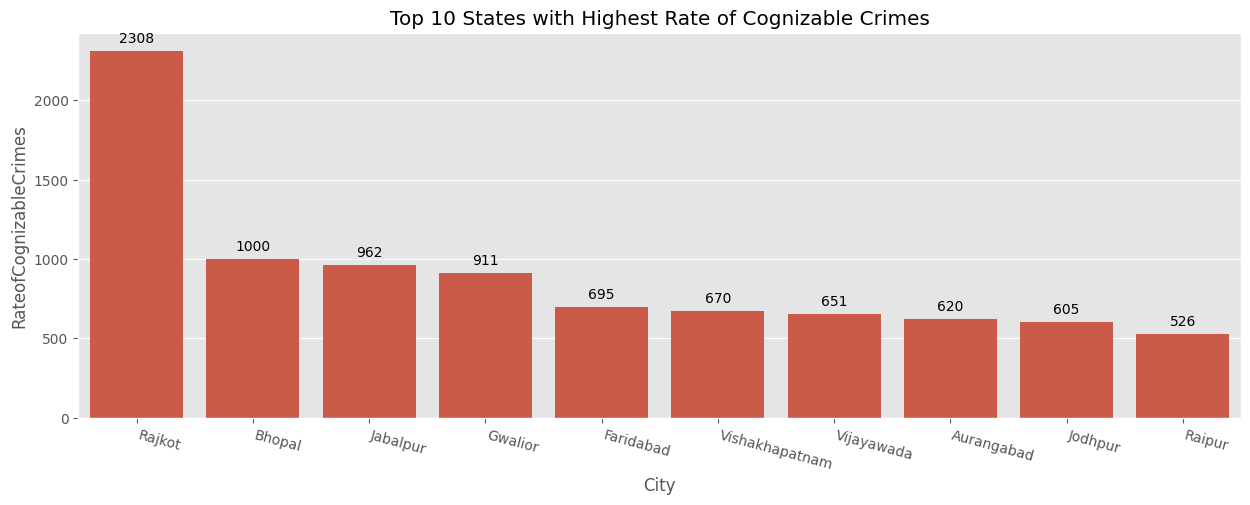

In [27]:
# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 States with Highest Rate of Cognizable Crimes')
barplot = sns.barplot(data=top_10, x='City', y='RateofCognizableCrimes')

# Adding numeric values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.show()

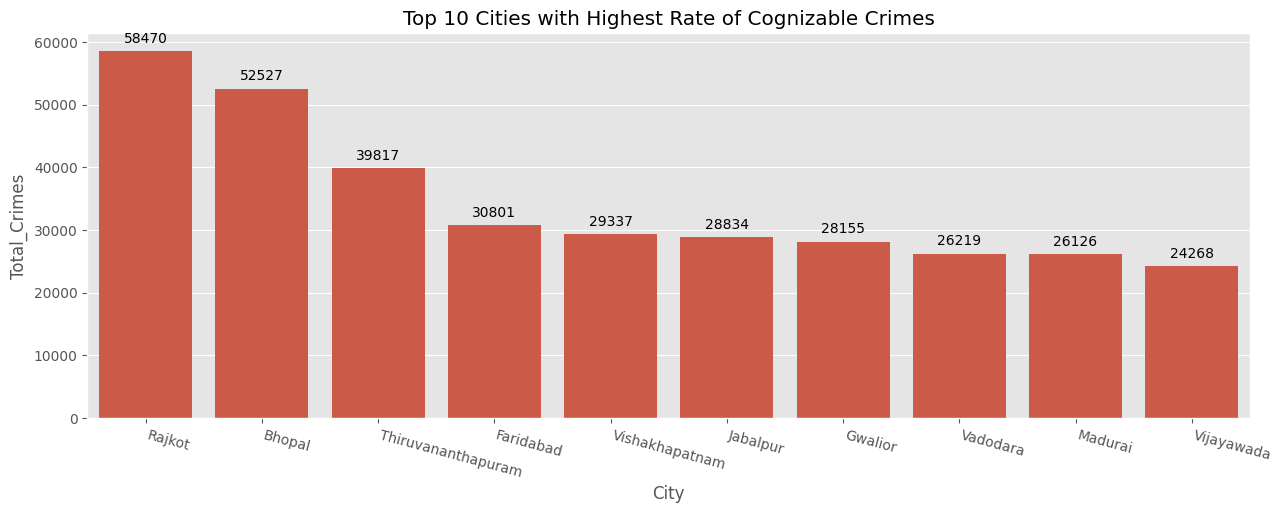

In [29]:
df = pd.read_csv('/content/sample_data/IPC_crimes_(City-wise)_2019-2021.xls',index_col=[0])
df=df[df['2019'] != '-']
df=df[df['2020'] != '-']
df=df[df['2021'] != '-']
df.head()

# Assuming 'RateofCognizableCrimes' is the relevant column for this analysis
df['2019'] = pd.to_numeric(df['2019'])
df['2020'] = pd.to_numeric(df['2020'])
df['2021'] = pd.to_numeric(df['2021'])
df['Total_Crimes'] = df['2019'] + df['2020'] + df['2021']

# Sort by total crimes and get the top 10
top_10_cities = df.sort_values('Total_Crimes', ascending=False).head(10)

# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 Cities with Highest Rate of Cognizable Crimes')
barplot = sns.barplot(data=top_10_cities, x='City', y='Total_Crimes')

# Adding numeric values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.show()

In [30]:
# Reshaping the data for easier plotting
df_melted = df.melt(id_vars=['City'], value_vars=['2019', '2020', '2021'], var_name='Year', value_name='Value')

In [34]:
# Load the dataset
df = pd.read_csv('/content/sample_data/victims_of_murder_(Gender_Age_Group-wise)_2021.xls', index_col=[0])

# Sort the data and select the top 15 rows
data = df.sort_values('Total', ascending=False).head(15)

# Reshape the data for plotting
data = data[['Name', 'Male', 'Female', 'Trans']].melt('Name', var_name='cols', value_name='vals')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


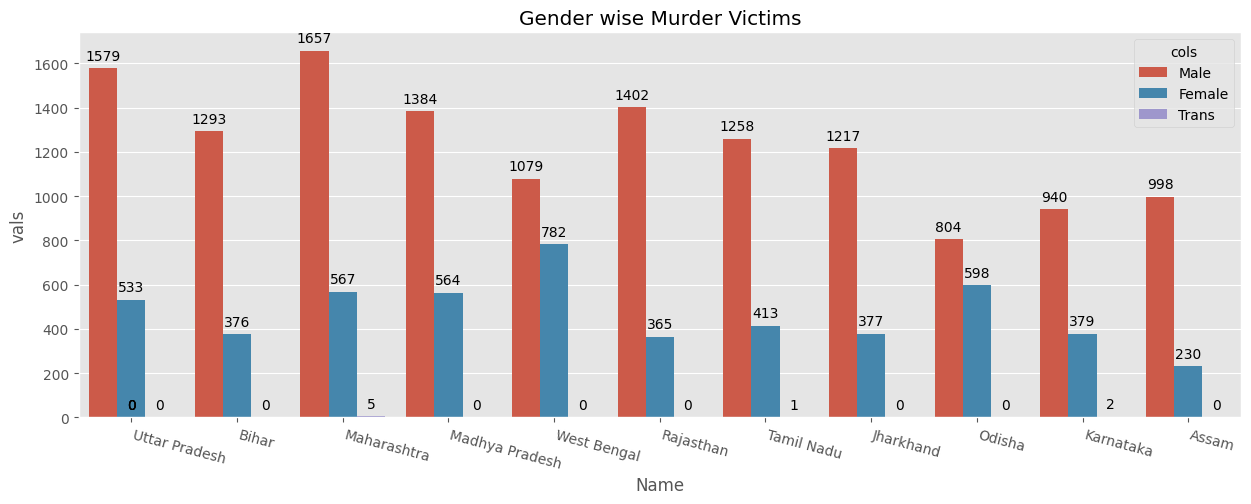

In [36]:
# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Gender wise Murder Victims')

# Create the barplot
ax = sns.barplot(data=data, x='Name', y='vals', hue='cols', errorbar=None)

# Adding numeric values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [37]:
# Load the dataset
df = pd.read_csv('/content/sample_data/crime_against_children_(State-UT-wise)_2019-2021.xls', index_col=[0])

# Sort and select the top 10 State with the highest Rate of Crime Against Children
top10_df = df.sort_values('RateofCrimeAgainstChildren', ascending=False).head(10)

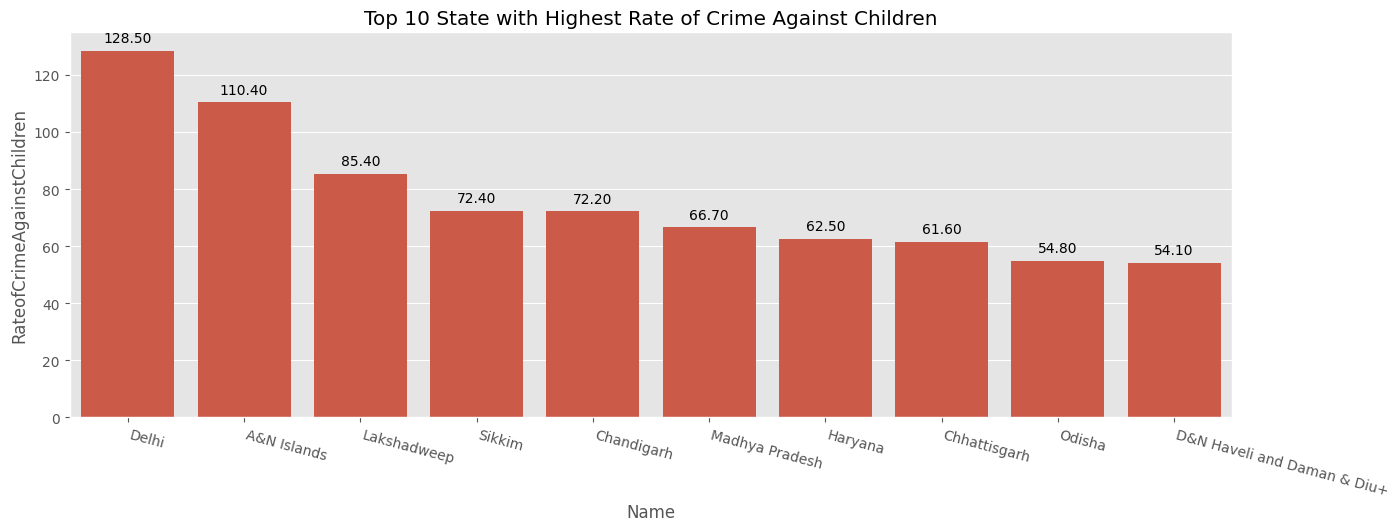

In [38]:
# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 State with Highest Rate of Crime Against Children')


ax = sns.barplot(data=top10_df, x='Name', y='RateofCrimeAgainstChildren', errorbar=None)

# Adding numeric values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [40]:
# Load the dataset
df = pd.read_csv('/content/sample_data/crime_against_women_(State-UT-wise)_2019-2021.xls', index_col=[0])

# Sort and select the top 10 State with the highest Rate of Crime Against Women
top10_df = df.sort_values('RateofCrimeAgainstWomen', ascending=False).head(10)

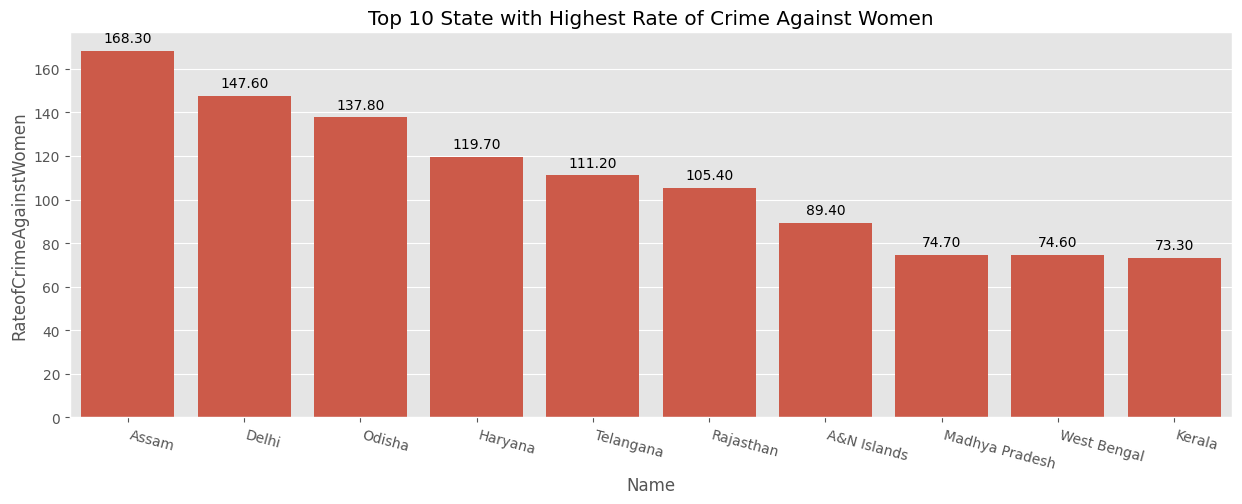

In [41]:
# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 State with Highest Rate of Crime Against Women')


ax = sns.barplot(data=top10_df, x='Name', y='RateofCrimeAgainstWomen', errorbar=None)

# Adding numeric values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [42]:
# Load the dataset
df = pd.read_csv('/content/sample_data/murder_cases_(State-UT-wise)_2019-2021.xls', index_col=[0])

# Sort and select the top 10 State with the highest Rate of Murder
top10_df = df.sort_values('RateofMurder', ascending=False).head(10)

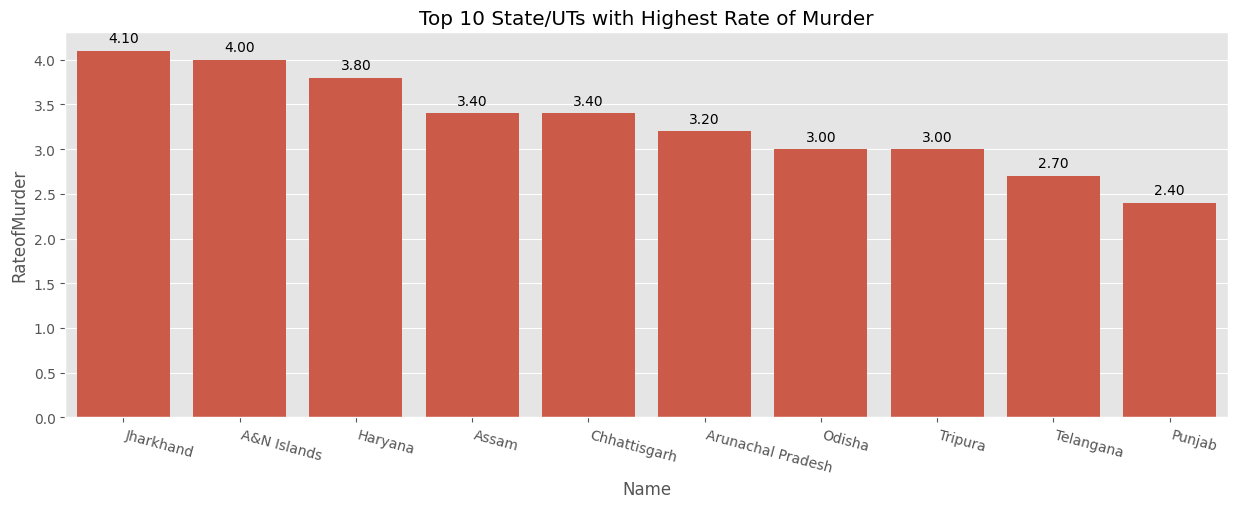

In [43]:
# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 State/UTs with Highest Rate of Murder')

ax = sns.barplot(data=top10_df, x='Name', y='RateofMurder', errorbar=None)

# Adding numeric values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [44]:
# Load the dataset
df = pd.read_csv('/content/sample_data/violent_crimes_(State-UT-wise)_2021.xls', index_col=[0])

# Sort and select the top 10 State with the highest Rate of Violent Crimes
top10_df = df.sort_values('RateofViolentCrimes', ascending=False).head(10)

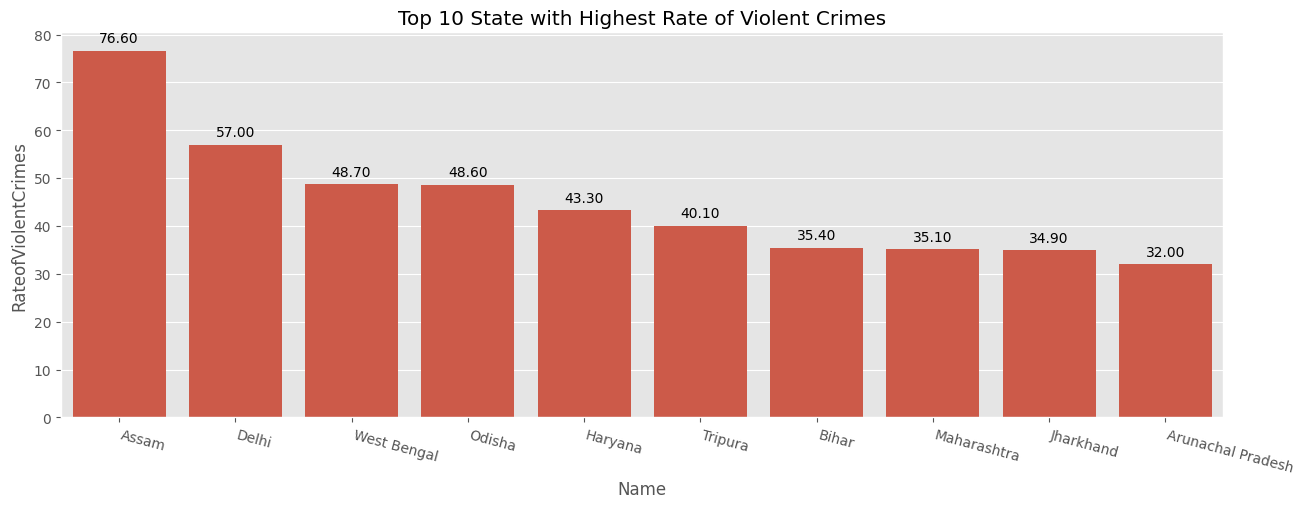

In [45]:
# Plotting the bar plot
plt.figure(figsize=(15, 5))
plt.xticks(rotation=-15, ha='left')
plt.title('Top 10 State with Highest Rate of Violent Crimes')


ax = sns.barplot(data=top10_df, x='Name', y='RateofViolentCrimes', errorbar=None)

# Adding numeric values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

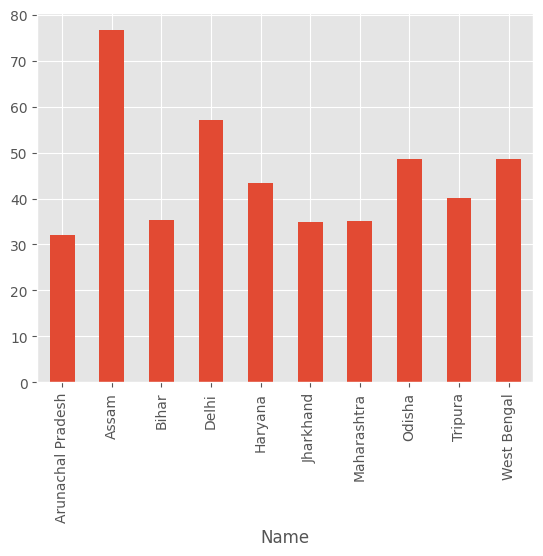

In [71]:
df = pd.read_csv('/content/sample_data/kidnapping_abduction_(State-UT-wise)_2019-2021.xls', index_col=[0])
df=df[df['2019'] != '-']
df=df[df['2020'] != '-']
df=df[df['2021'] != '-']
df.head()
def plotRate(df, column, group_by_column):
    df.groupby(group_by_column)[column].mean().plot(kind='bar')
    plt.show()

plotRate(top10_df,'RateofViolentCrimes', 'Name')



In [70]:
print(top10_df.columns)


Index(['State/UT', 'Name', '2019', '2020', '2021', 'midPopulation',
       'RateofViolentCrimes', 'ChargesSheetingRate'],
      dtype='object')
